<a href="https://colab.research.google.com/github/RosminVarghese/Major-project/blob/main/Forecasting_Covid_19_trend_for_30_days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/owid-covid-data_recent.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
df.shape

(82085, 59)

In [ ]:
df.describe

<bound method NDFrame.describe of       iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
82080      ZWE    Africa  ...           61.49                   0.571
82081      ZWE    Africa  ...           61.49                   0.571
82082      ZWE    Africa  ...           61.49                   0.571
82083      ZWE    Africa  ...           61.49                   0.571
82084      ZWE    Africa  ...           61.49                   0.571

[82085 rows x 59 columns]>

In [ ]:
df.info

<bound method DataFrame.info of       iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
82080      ZWE    Africa  ...           61.49                   0.571
82081      ZWE    Africa  ...           61.49                   0.571
82082      ZWE    Africa  ...           61.49                   0.571
82083      ZWE    Africa  ...           61.49                   0.571
82084      ZWE    Africa  ...           61.49                   0.571

[82085 rows x 59 columns]>

In [ ]:
dataset = df[['location', 'date', 'total_cases', 'total_deaths', 'positive_rate', 'population', 'population_density', 'median_age', 'aged_65_older','aged_70_older']]
dataset.head()

,location,date,total_cases,total_deaths,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older
0,Afghanistan,2020-02-24,1.0,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337
1,Afghanistan,2020-02-25,1.0,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337
2,Afghanistan,2020-02-26,1.0,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337
3,Afghanistan,2020-02-27,1.0,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337
4,Afghanistan,2020-02-28,1.0,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337


In [ ]:
dataset.dtypes

location               object
date                   object
total_cases           float64
total_deaths          float64
positive_rate         float64
population            float64
population_density    float64
median_age            float64
aged_65_older         float64
aged_70_older         float64
dtype: object

In [ ]:
dataset.isnull().sum()

location                  0
date                      0
total_cases            1799
total_deaths          11347
positive_rate         40670
population              526
population_density     5640
median_age             8032
aged_65_older          8880
aged_70_older          8448
dtype: int64

In [ ]:
#dataset = dataset.fillna(0)
dataset.dropna(subset=['total_cases','total_deaths'], inplace = True)
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,date,total_cases,total_deaths,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older
27,Afghanistan,2020-03-22,34.0,1.0,NaN,38928341.0,54.422,18.6,2.581,1.337
28,Afghanistan,2020-03-23,41.0,1.0,NaN,38928341.0,54.422,18.6,2.581,1.337
29,Afghanistan,2020-03-24,43.0,1.0,NaN,38928341.0,54.422,18.6,2.581,1.337
30,Afghanistan,2020-03-25,76.0,2.0,NaN,38928341.0,54.422,18.6,2.581,1.337
31,Afghanistan,2020-03-26,80.0,3.0,NaN,38928341.0,54.422,18.6,2.581,1.337


In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,date,total_cases,total_deaths,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older
27,Afghanistan,2020-03-22,34.0,1.0,NaN,38928341.0,54.422,18.6,2.581,1.337
28,Afghanistan,2020-03-23,41.0,1.0,NaN,38928341.0,54.422,18.6,2.581,1.337
29,Afghanistan,2020-03-24,43.0,1.0,NaN,38928341.0,54.422,18.6,2.581,1.337
30,Afghanistan,2020-03-25,76.0,2.0,NaN,38928341.0,54.422,18.6,2.581,1.337
31,Afghanistan,2020-03-26,80.0,3.0,NaN,38928341.0,54.422,18.6,2.581,1.337


In [ ]:
dataset.dtypes

location                      object
date                  datetime64[ns]
total_cases                  float64
total_deaths                 float64
positive_rate                float64
population                   float64
population_density           float64
median_age                   float64
aged_65_older                float64
aged_70_older                float64
dtype: object

In [ ]:
countries = ['India','United States', 'Brazil', 'France', 'Russia', 'United Kingdom']

In [ ]:
max_case_countries_df = dataset[dataset['location'].isin(countries)]
max_case_countries_df.head()

,location,date,total_cases,total_deaths,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older
10535,Brazil,2020-03-17,321.0,1.0,NaN,212559409.0,25.04,33.5,8.552,5.06
10536,Brazil,2020-03-18,372.0,3.0,NaN,212559409.0,25.04,33.5,8.552,5.06
10537,Brazil,2020-03-19,621.0,6.0,NaN,212559409.0,25.04,33.5,8.552,5.06
10538,Brazil,2020-03-20,793.0,11.0,NaN,212559409.0,25.04,33.5,8.552,5.06
10539,Brazil,2020-03-21,1021.0,15.0,NaN,212559409.0,25.04,33.5,8.552,5.06


In [ ]:
max_case_countries_df.shape

(2439, 10)

In [ ]:
df_india = max_case_countries_df[max_case_countries_df['location']=='India']
df_uk = max_case_countries_df[max_case_countries_df['location']=='United Kingdom']
df_us = max_case_countries_df[max_case_countries_df['location']=='United States']
df_russia = max_case_countries_df[max_case_countries_df['location']=='Russia']
df_brazil = max_case_countries_df[max_case_countries_df['location']=='Brazil']
df_france = max_case_countries_df[max_case_countries_df['location']=='France']

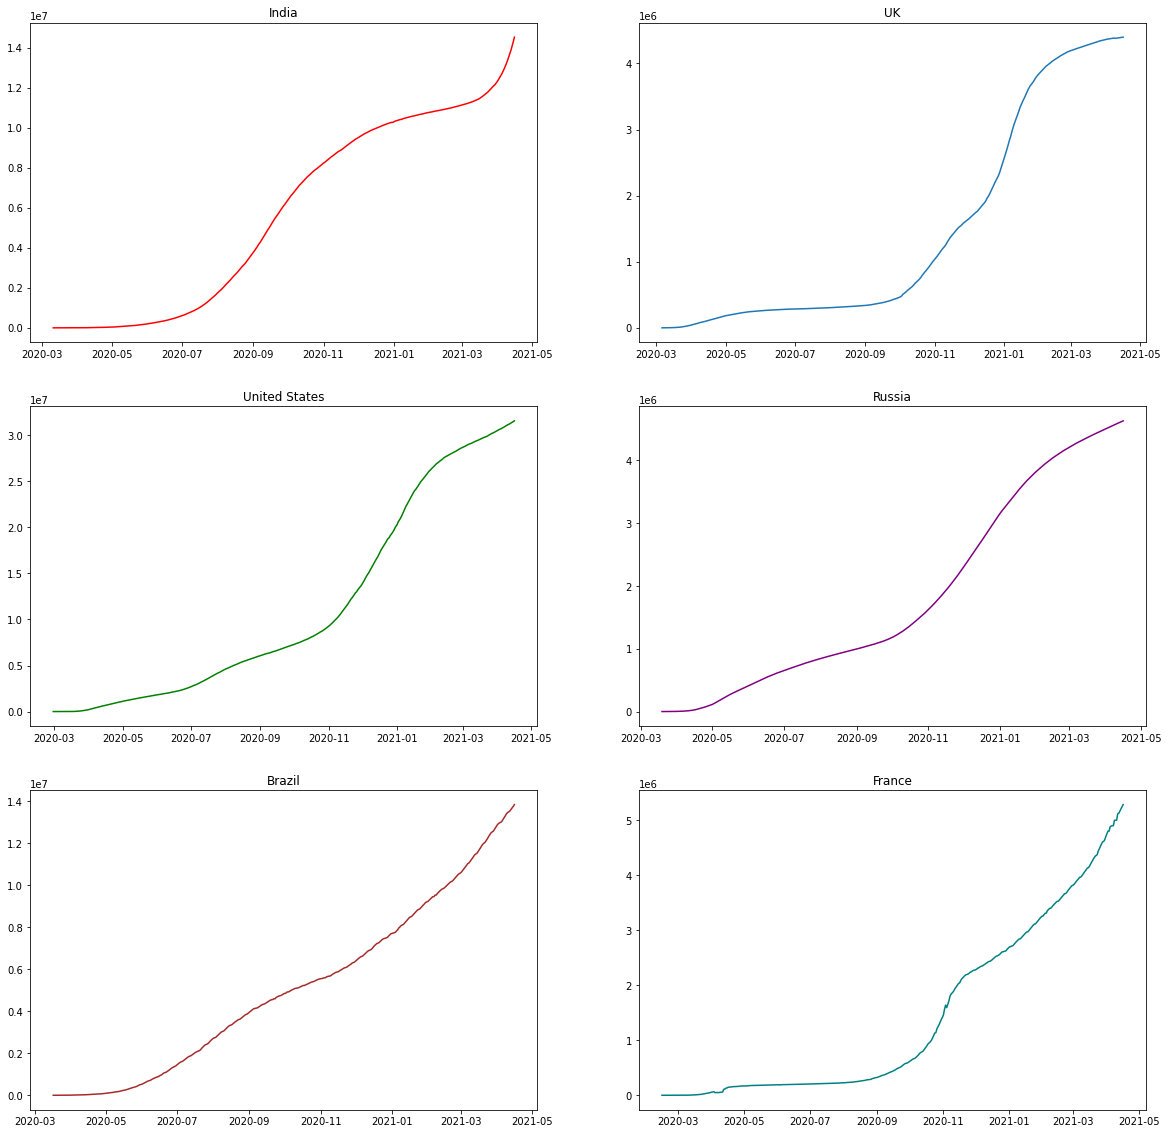

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(321)
ax1.set_title('India')
ax1.plot(df_india['date'], df_india['total_cases'], color='red')

ax2 = fig.add_subplot(322)
ax2.set_title('UK')
ax2.plot(df_uk['date'], df_uk['total_cases'])

ax3 = fig.add_subplot(323)
ax3.set_title('United States')
ax3.plot(df_us['date'], df_us['total_cases'], color='green')

ax4 = fig.add_subplot(324)
ax4.set_title('Russia')
ax4.plot(df_russia['date'], df_russia['total_cases'], color='purple')

ax5 = fig.add_subplot(325)
ax5.set_title('Brazil')
ax5.plot(df_brazil['date'], df_brazil['total_cases'], color='brown')

ax6 = fig.add_subplot(326)
ax6.set_title('France')
ax6.plot(df_france['date'], df_france['total_cases'], color='teal')

In [ ]:
remove=['World','Europe','Asia','North America','South America','Africa','Australia','European Union']
df_total_cases = dataset[dataset['date']=='2021-04-09']
df_total_cases = df_total_cases[~df_total_cases['location'].isin(remove)]
df_total_cases.head()

,location,date,total_cases,total_deaths,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older
410,Afghanistan,2021-04-09,57019.0,2521.0,NaN,38928341.0,54.422,18.6,2.581,1.337
1256,Albania,2021-04-09,127795.0,2304.0,0.103,2877800.0,104.871,38.0,13.188,8.643
1673,Algeria,2021-04-09,118251.0,3123.0,NaN,43851043.0,17.348,29.1,6.211,3.857
2084,Andorra,2021-04-09,12456.0,120.0,0.126,77265.0,163.755,NaN,NaN,NaN
2477,Angola,2021-04-09,23242.0,549.0,NaN,32866268.0,23.890,16.8,2.405,1.362


In [ ]:
df_total_cases.shape

(182, 10)

In [ ]:
max_cases = df_total_cases['total_cases'].max()
print('Maximum number of covid cases = ' + str(max_cases))
min_cases = df_total_cases['total_cases'].min()
print('Minimum number of covid cases = ' + str(min_cases))

Maximum number of covid cases = 31084962.0
Minimum number of covid cases = 68.0


In [ ]:
df_total_cases.loc[df_total_cases['total_cases'].idxmax()]

location                    United States
date                  2021-04-09 00:00:00
total_cases                    3.1085e+07
total_deaths                       561164
positive_rate                       0.058
population                    3.31003e+08
population_density                 35.608
median_age                           38.3
aged_65_older                      15.413
aged_70_older                       9.732
Name: 78254, dtype: object

In [ ]:
df_total_cases.loc[df_total_cases['total_cases'].idxmin()]

location                             Fiji
date                  2021-04-09 00:00:00
total_cases                            68
total_deaths                            2
positive_rate                       0.001
population                         896444
population_density                 49.562
median_age                           28.6
aged_65_older                       6.224
aged_70_older                       3.284
Name: 26346, dtype: object

# Country with the highest number of covid-19 CASES

In [ ]:
df_total_cases[['location','total_cases']][df_total_cases.total_cases == df_total_cases['total_cases'].max()]


,location,total_cases
78254,United States,31084962.0


# Country with the lowest number of covid-19 CASES

In [ ]:
df_total_cases[['location','total_cases']][df_total_cases.total_cases == df_total_cases['total_cases'].min()]


,location,total_cases
26346,Fiji,68.0


In [ ]:
df_total_cases.loc[df_total_cases['total_deaths'].idxmax()]

location                    United States
date                  2021-04-09 00:00:00
total_cases                    3.1085e+07
total_deaths                       561164
positive_rate                       0.058
population                    3.31003e+08
population_density                 35.608
median_age                           38.3
aged_65_older                      15.413
aged_70_older                       9.732
Name: 78254, dtype: object

In [ ]:
df_total_cases.loc[df_total_cases['total_deaths'].idxmin()]

location                           Bhutan
date                  2021-04-09 00:00:00
total_cases                           906
total_deaths                            1
positive_rate                       0.001
population                         771612
population_density                 21.188
median_age                           28.6
aged_65_older                       4.885
aged_70_older                       2.977
Name: 9314, dtype: object

## Country with the highest number of DEATHS

In [ ]:
df_total_cases[['location','total_deaths']][df_total_cases.total_deaths == df_total_cases['total_deaths'].max()]


,location,total_deaths
78254,United States,561164.0


## Country with the lowest number of DEATHS

In [ ]:
df_total_cases[['location','total_deaths']][df_total_cases.total_deaths == df_total_cases['total_deaths'].min()]


,location,total_deaths
9314,Bhutan,1.0
30277,Grenada,1.0
74417,Timor,1.0


## Forecasting for INDIA

In [ ]:
df_prophet_ind= pd.DataFrame()
df_prophet_ind['ds'] = df_india["date"]
df_prophet_ind['y']= df_india['total_cases']
df_prophet_ind.head()

,ds,y
33759,2020-03-11,62.0
33760,2020-03-12,73.0
33761,2020-03-13,82.0
33762,2020-03-14,102.0
33763,2020-03-15,113.0


In [ ]:
from fbprophet import Prophet
model_ind= Prophet()
model_ind.fit(df_prophet_ind)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_ind = model_ind.make_future_dataframe(periods=30)
future_ind

,ds
0,2020-03-11
1,2020-03-12
2,2020-03-13
3,2020-03-14
4,2020-03-15
...,...
427,2021-05-12
428,2021-05-13
429,2021-05-14
430,2021-05-15


In [ ]:
df_india.tail()

,location,date,total_cases,total_deaths,positive_rate,population,population_density,median_age,aged_65_older,aged_70_older
34156,India,2021-04-12,13689453.0,171058.0,0.114,1.380004e+09,450.419,28.2,5.989,3.414
34157,India,2021-04-13,13873825.0,172085.0,0.119,1.380004e+09,450.419,28.2,5.989,3.414
34158,India,2021-04-14,14074564.0,173123.0,0.125,1.380004e+09,450.419,28.2,5.989,3.414
34159,India,2021-04-15,14291917.0,174308.0,0.132,1.380004e+09,450.419,28.2,5.989,3.414
34160,India,2021-04-16,14526609.0,175649.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414


In [ ]:
future_ind.tail()

,ds
427,2021-05-12
428,2021-05-13
429,2021-05-14
430,2021-05-15
431,2021-05-16


In [ ]:
forecast_ind = model_ind.predict(future_ind)
forecast_ind

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-11,-4.998921e+04,-3.046076e+05,2.471748e+05,-4.998921e+04,-4.998921e+04,2570.579582,2570.579582,2570.579582,2570.579582,2570.579582,2570.579582,0.0,0.0,0.0,-4.741863e+04
1,2020-03-12,-4.779613e+04,-2.918289e+05,2.142523e+05,-4.779613e+04,-4.779613e+04,8301.610616,8301.610616,8301.610616,8301.610616,8301.610616,8301.610616,0.0,0.0,0.0,-3.949452e+04
2,2020-03-13,-4.560304e+04,-3.280149e+05,2.368851e+05,-4.560304e+04,-4.560304e+04,15064.650246,15064.650246,15064.650246,15064.650246,15064.650246,15064.650246,0.0,0.0,0.0,-3.053839e+04
3,2020-03-14,-4.340996e+04,-3.081698e+05,2.238521e+05,-4.340996e+04,-4.340996e+04,-8874.483148,-8874.483148,-8874.483148,-8874.483148,-8874.483148,-8874.483148,0.0,0.0,0.0,-5.228444e+04
4,2020-03-15,-4.121687e+04,-2.903896e+05,2.293832e+05,-4.121687e+04,-4.121687e+04,-5762.856212,-5762.856212,-5762.856212,-5762.856212,-5762.856212,-5762.856212,0.0,0.0,0.0,-4.697973e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2021-05-12,1.368234e+07,1.335803e+07,1.401607e+07,1.349955e+07,1.384640e+07,2570.579582,2570.579582,2570.579582,2570.579582,2570.579582,2570.579582,0.0,0.0,0.0,1.368491e+07
428,2021-05-13,1.371300e+07,1.336314e+07,1.404266e+07,1.351879e+07,1.389037e+07,8301.610616,8301.610616,8301.610616,8301.610616,8301.610616,8301.610616,0.0,0.0,0.0,1.372130e+07
429,2021-05-14,1.374366e+07,1.340949e+07,1.408922e+07,1.354048e+07,1.393230e+07,15064.650246,15064.650246,15064.650246,15064.650246,15064.650246,15064.650246,0.0,0.0,0.0,1.375872e+07
430,2021-05-15,1.377432e+07,1.338656e+07,1.410576e+07,1.355726e+07,1.397591e+07,-8874.483148,-8874.483148,-8874.483148,-8874.483148,-8874.483148,-8874.483148,0.0,0.0,0.0,1.376544e+07


In [ ]:
forecast_ind[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
427,2021-05-12,1.368491e+07,1.335803e+07,1.401607e+07
428,2021-05-13,1.372130e+07,1.336314e+07,1.404266e+07
429,2021-05-14,1.375872e+07,1.340949e+07,1.408922e+07
430,2021-05-15,1.376544e+07,1.338656e+07,1.410576e+07
431,2021-05-16,1.379921e+07,1.341209e+07,1.418250e+07


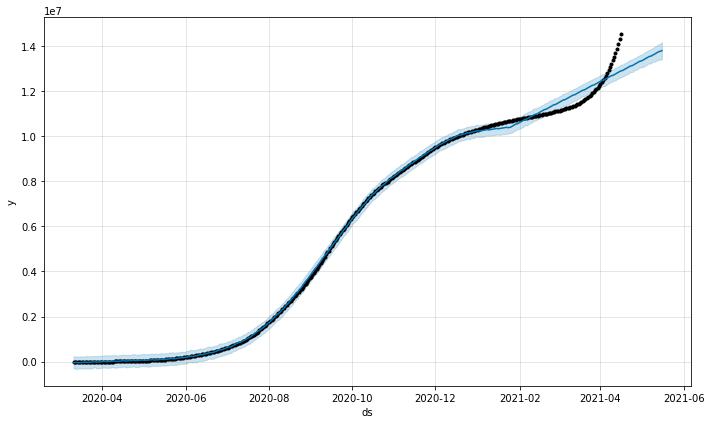

In [ ]:
model_ind.plot(forecast_ind);

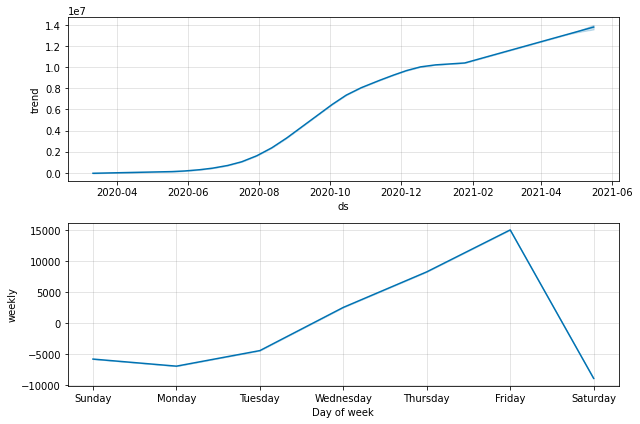

In [ ]:
model_ind.plot_components(forecast_ind);

## Forecasting for USA

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


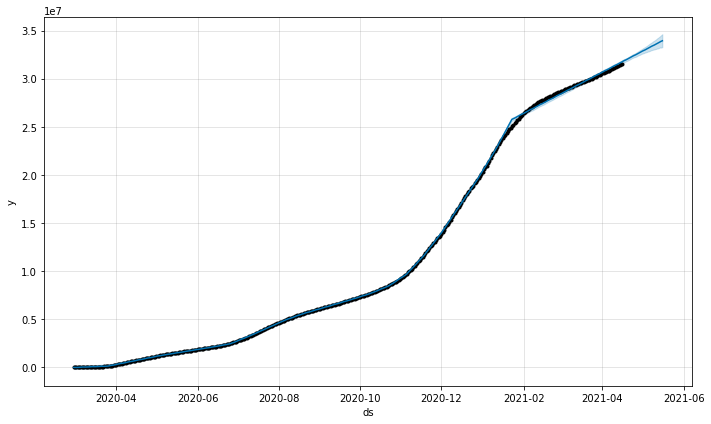

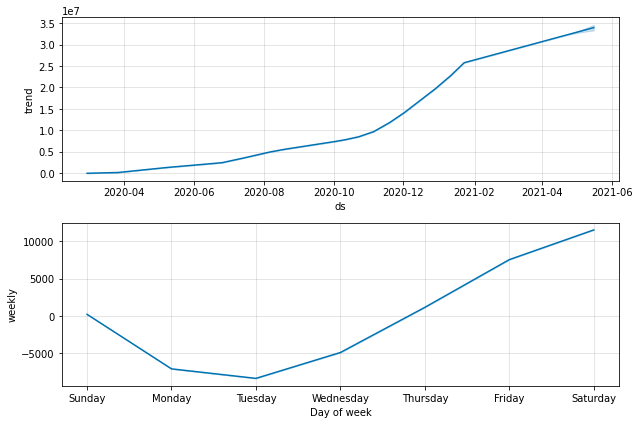

In [ ]:
df_prophet_us= pd.DataFrame()
df_prophet_us['ds'] = df_us["date"]
df_prophet_us['y']= df_us['total_cases']
model_us = Prophet()
model_us.fit(df_prophet_us)
future_us = model_us.make_future_dataframe(periods=30)
forecast_us = model_us.predict(future_us)
model_us.plot(forecast_us);
model_us.plot_components(forecast_us);